<a href="https://colab.research.google.com/github/junkuna/Machine-Learning-Training/blob/main/Data_Processing_and_Standard_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0.]


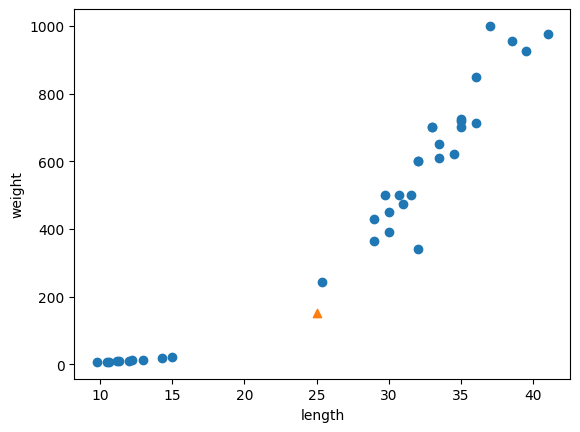

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


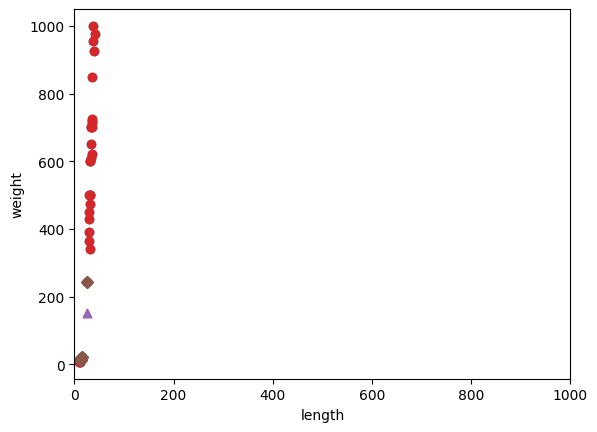

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


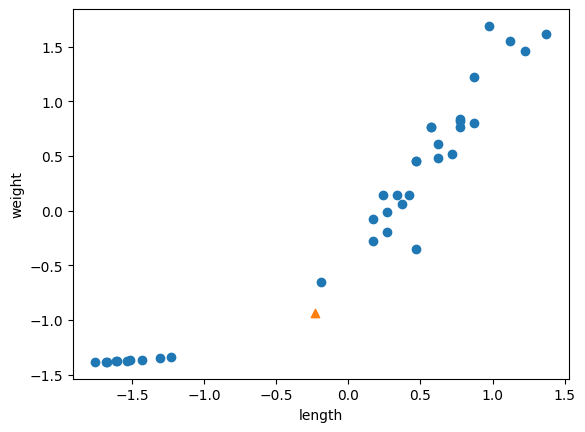

[1.]


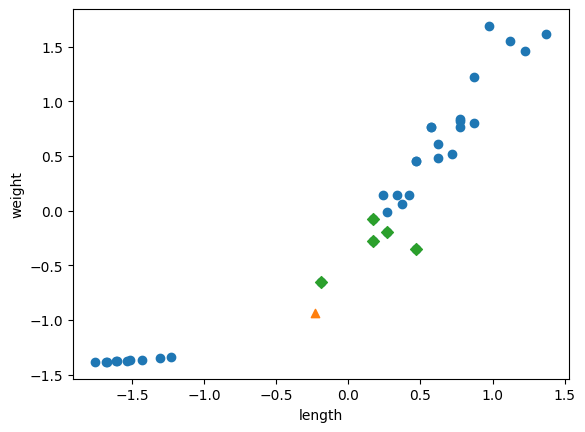

In [ ]:
#Data Processing without Standard Score
## The purpose to nevigate positive samples and produce big scale of it
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## produce sample with 2D space
import numpy as np


fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

### divide bream 35 and smelt 14
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)


## set the positive range of the samples to split between train and test sets
from sklearn.model_selection import train_test_split

### this method is negetive due to difference rate of bream and smelt comparing to sample and test target. We will use 'stratify' to resolve it.

#### train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

### to check if train and test set split positively by shape method

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

print(test_target)

## training and test data starts
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

### we put the samples in tested data and it was negetive. Let's check the graph and take a look
### 'marker' will point out the negetive spot
print(kn.predict([[25, 150]]))

import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## It suppose to show bream but it was smelt. We need to see near data to check the outcome

### check using indexes
distance, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

print(train_input[indexes])
print(train_target[indexes])

### check using distances with producing same scale of length and weight
print(distance)

plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


#Data Processing with Standard Score

## Standard Score supports accurate outcome using broadcasting
## Broadcasting method by numpy
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

train_scaled = (train_input - mean) / std

### express through the graph
### this is negative due to sample range gap with train_scaled data. We have to define sample through scale value
#### plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
#### plt.scatter(25, 250, marker = '^')
#### plt.xlabel('length')
#### plt.ylabel('weight')
#### plt.show()

new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## train and test
### need to revise the test range through scaled value
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)


print(kn.predict([new]))

## produce graph with kneighbors
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

